In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import get_user_item_pairs, data_split
from optimization import tunning_number_iterations, tunning_latent_factors,tunning_regulator, tunning_learning_rate, k_cross_validation
import model as md
import pickle

# ECE196 - Machine Learning Project
Project: Collaborative Filtering recommender system for providing recommendations from the MovieLens dataset <br>
Authors: Noah Teshima, Luis Jibaja

## Section 1: Dataset and Analysis
We used the MovieLens data set to build our recomendation system. The data consist of the movies information <br>
and the movies rating from a sample set of users

In [2]:
# Read Data and store on dataframes
movie_database = pd.read_csv('Small_Data/movies.csv')
users_ratings = pd.read_csv('Small_Data/ratings.csv')

We display the first 10 movies from the data set, where we can obtain information such as <br>
movie id, the title and the genres

In [3]:
# Display the first 10 items from the movies data set
movie_database[0:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


For the user rating data set we display the first 5 samples, where we see information such as <br>
the user id, the movie id, rating, and timestamp

In [4]:
# Display the first 5 items from the rating data set
users_ratings[0:5]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Shift users and movies ID by 1, so start at 0
users_ratings['userId'] = users_ratings['userId'] - 1
users_ratings['movieId'] = users_ratings['movieId'] - 1
movie_database['movieId'] = movie_database['movieId'] - 1

After shifting the ids, so can start from 0. we see some statistics form the rating data set <br>
As the shifting results we observe that the smallest id for movies and users is 0. <br> <br>
It is also important set the range of the ratings, as we observe 
ratings range from 0.5 to 5

In [6]:
# Print ratings statistics describing numeric features
users_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,325.127564,19434.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,0.000000,0.000000,0.500000,8.281246e+08
25%,176.000000,1198.000000,3.000000,1.019124e+09
50%,324.000000,2990.000000,3.500000,1.186087e+09
75%,476.000000,8121.000000,4.000000,1.435994e+09
max,609.000000,193608.000000,5.000000,1.537799e+09


## Section 2: Data Parsing and Dictionary construction
Due to the size of the data set for movies and rating. We decide to build a dictionary <br>
where we store the user ID, the movie ID and the rating. <br> <br>
From this dictionary we build 2 list: <br>
List Users ID: contain a unique copy each user ID <br>
List Movies ID: contain a unique copy of each movie ID <br>

In [7]:
# Construct the data set based on the index of user, movies bind with the respective rating
# Build the list of usersIds
# Build the list of movieIds
(user_item_rating, list_userId, list_movieId)  = get_user_item_pairs(movie_database,users_ratings)

The following data break the data set into 3 sets: Test, Train,Validation <br> <br>
Where the test data represent 10% from the original data set <br>
Then we split the rest 25% for validation and 75% for training

In [8]:
# Split the data in train, validation and test set
# Get the 10% for test set
# Break the rest for 25% validation and 75% train
#(train_data,val_data,test_data) = data_split(user_item_rating)

In [9]:
# The following lines of code are to save the process data used for the training and tunning
# NO ON COMMENT
data_file_name = 'parse_data.pickle'
#save_data = {'train_data':train_data,'val_data':val_data,'test_data':test_data}
#with open(data_file_name,'wb') as handle:
#    pickle.dump(save_data,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# This cell re load a pre proces data that was already split and used for training
with open(data_file_name, 'rb') as handle:
    save_data = pickle.load(handle)
    train_data = save_data['train_data']
    val_data = save_data['val_data']
    test_data = save_data['test_data']

## Section 3: Training of the CF Model
The CF Model is a Collaborative Filtering Model where we train a matrix factorization model<br>
using stochastic gradient descent. <br>
The class constructor take: <br>
List Users Id<br>
List Movie Id<br>

After each training we can obtain the minimum loss from the validation data, and update the best<br>
embeddings, which we can obtain from a dictionary in our class <br>
user_embeddings = model.embeddings_var['P']<br>
movie_embeddings = model.embeddings_var['V']

To find the best hyper-parameters, we perform hold out tunning, starting from a initial hyper-parameters

### Section 3.1: Tunning number of iterations
First we perform the tunning of the number of iterations, so we can find which are the best
number of epochs we should perform stochastic gradient descent for a optimal convergence <br>
We start perform 10 experiments where we increment from 10 until 100 number of iterations

In [11]:
# Perform tunning on the number of iterations for 10 experiments
# In each experiment increment the number of iterations from: 10, 20, until 100 iterations
# Save best model and collect the minimun validation for each experiment
best_model, validation_table = tunning_number_iterations(train_data,val_data,list_userId,list_movieId,10)

Number Training Iterations: 10 - Validation Loss: 0.1286305
Number Training Iterations: 20 - Validation Loss: 0.0524925
Number Training Iterations: 30 - Validation Loss: 0.050993
Number Training Iterations: 40 - Validation Loss: 0.0509558
Number Training Iterations: 50 - Validation Loss: 0.0509642
Number Training Iterations: 60 - Validation Loss: 0.0509595
Number Training Iterations: 70 - Validation Loss: 0.05096
Number Training Iterations: 80 - Validation Loss: 0.050963
Number Training Iterations: 90 - Validation Loss: 0.0509608
Number Training Iterations: 100 - Validation Loss: 0.0509751


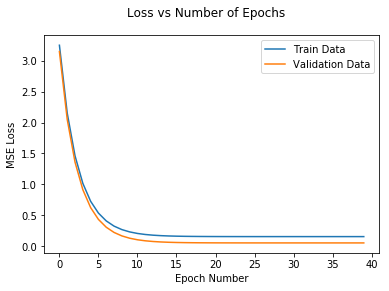

In [12]:
# Display the loss of the best model
best_model.plot_loss()

In [13]:
# Display the Validation Loss of each experiment
# Highligh the experiment with smallest validation loss
display(validation_table.style.highlight_min('Validation Loss').hide_index())

Number Iterations,Validation Loss
10,0.128631
20,0.052492
30,0.050993
40,0.050956
50,0.050964
60,0.050959
70,0.050960
80,0.050963
90,0.050961
100,0.050975


From our experiments we obtain that the smallest validatiton we obtain when <br>
number of iterations: 40

In [14]:
# Calculate and display the test loss and the norm of the feedback matrix of the best model
test_loss =  best_model.calculate_test_loss(test_data)
norm = best_model.calculate_norm()
test_norm_dict = {'Test Loss': [test_loss],'Norm':[norm]}
display(pd.DataFrame.from_dict(test_norm_dict).style.hide_index())

Test Loss,Norm
0.022442,19.989722


### Section 3.2: Tunning Learning Rate
For tunning this hyper parameter, if we try to use a learning rate greater  than 0.0001, <br>
we obtain validation loss that go to inf, therefore due to this constrain we just tune <br>
with values bellow this learning rate. <br>
Also we keep number iterations: 40, since this was the optimal from the previous tunning

In [16]:
best_model, validation_table =  tunning_learning_rate(train_data,val_data,list_userId,list_movieId,numIter=40)

Learning Rate: 0.0001 - Validation Loss: 0.0509617
Learning Rate: 1e-05 - Validation Loss: 0.0509559
Learning Rate: 3e-05 - Validation Loss: 0.0509673
Learning Rate: 7e-05 - Validation Loss: 0.0509647
Learning Rate: 1e-06 - Validation Loss: 1.1104312
Learning Rate: 3e-06 - Validation Loss: 0.1001846
Learning Rate: 7e-06 - Validation Loss: 0.0510516


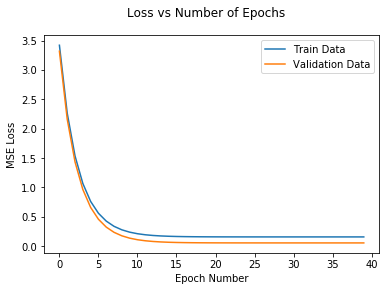

In [17]:
best_model.plot_loss()

In [18]:
# Display the Validation Loss of each experiment
# Highligh the experiment with smallest validation loss
display(validation_table.style.highlight_min('Validation Loss').hide_index())

Learning Rate,Validation Loss
0.000100,0.050962
0.000010,0.050956
0.000030,0.050967
0.000070,0.050965
0.000001,1.110431
0.000003,0.100185
0.000007,0.051052


The smallest validation loss happen when <br>
learning rate: 0.00001

In [19]:
# Calculate and display the test loss and the norm of the feedback matrix of the best model
test_loss = best_model.calculate_test_loss(test_data)
norm = best_model.calculate_norm()
test_norm_dict = {'Test Loss': [test_loss],'Norm':[norm]}
display(pd.DataFrame.from_dict(test_norm_dict).style.hide_index())

Test Loss,Norm
0.022444,20.516256


### Section 3.3: Tuning Number of Latent Factors
For tuning this hyper-parameter we start with a small number<br>
We notice that the validation loss tend to increase as the number of this  factors increase.<br>


In [24]:
best_model, validation_table = tunning_latent_factors(train_data,val_data,list_userId,list_movieId,numIter=40,alpha=0.00001,latent_factors=5)

Num Latent Factors: 5 - Validation Loss: 0.0509711
Num Latent Factors: 10 - Validation Loss: 0.0510576
Num Latent Factors: 15 - Validation Loss: 0.0511245
Num Latent Factors: 20 - Validation Loss: 0.0511996
Num Latent Factors: 25 - Validation Loss: 0.051267


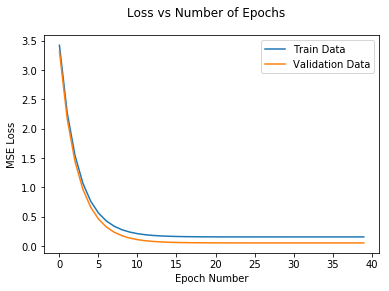

In [25]:
best_model.plot_loss()

In [26]:
# Display the Validation Loss of each experiment
# Highligh the experiment with smallest validation loss
display(validation_table.style.highlight_min('Validation Loss').hide_index())

Latent Factors,Validation Loss
5,0.050971
10,0.051058
15,0.051125
20,0.051200
25,0.051267


The smallest validation loss is when <br>
Number Latent Factors: 5

In [27]:
# Calculate and display the test loss and the norm of the feedback matrix of the best model
test_loss = best_model.calculate_test_loss(test_data)
norm = best_model.calculate_norm()
test_norm_dict = {'Test Loss': [test_loss],'Norm':[norm]}
display(pd.DataFrame.from_dict(test_norm_dict).style.hide_index())

Test Loss,Norm
0.022451,22.528618


### Section 3.4: Tuning Regulator
The objetive of the regulator is penalize the embeddings, and prevent overfit<br>
Therefore is important to tune this hyper-parameter

In [28]:
best_model, validation_table = tunning_regulator(train_data,val_data,list_userId,list_movieId,numIter=40,alpha=0.00001,k=5)

Regulator: 0.1 - Validation Loss: 0.0509637
Regulator: 0.01 - Validation Loss: 0.0509568
Regulator: 0.001 - Validation Loss: 0.0509594
Regulator: 0.0001 - Validation Loss: 0.0509512
Regulator: 1e-05 - Validation Loss: 0.0509569


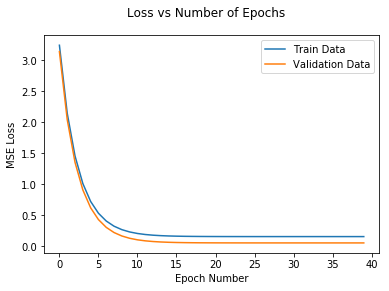

In [29]:
best_model.plot_loss()

In [30]:
# Display the Validation Loss of each experiment
# Highligh the experiment with smallest validation loss
display(validation_table.style.highlight_min('Validation Loss').hide_index())

Regulator,Validation Loss
0.100000,0.050964
0.010000,0.050957
0.001000,0.050959
0.000100,0.050951
0.000010,0.050957


The smallest validation loss is when: <Br>
Regulator: 0.0001

In [31]:
# Calculate and display the test loss and the norm of the feedback matrix of the best model
test_loss = best_model.calculate_test_loss(test_data)
norm = best_model.calculate_norm()
test_norm_dict = {'Test Loss': [test_loss],'Norm':[norm]}
display(pd.DataFrame.from_dict(test_norm_dict).style.hide_index())

Test Loss,Norm
0.022443,20.758000


## Section 4: Best Model
This section shows a pre trained model, which was obtain from the initial training<br>
If you re run the model and un comment the following cell, the results may vary <br>
due to the initialization of the embeddings, and the data set split

In [15]:
best_model_file_name = 'best_model.pickle'
#final_model_dic = {'best_model': best_model}
#with open(best_model_file_name,'wb') as handle:
#    pickle.dump(best_model,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
with open(best_model_file_name, 'rb') as handle:
    final_model = pickle.load(handle)

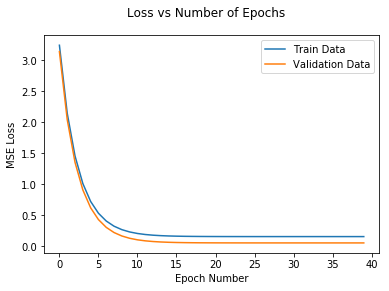

In [17]:
final_model.plot_loss()

In [18]:
# Calculate and display the test loss and the norm of the feedback matrix of the best model
test_loss = final_model.calculate_test_loss(test_data)
norm = final_model.calculate_norm()
test_norm_dict = {'Test Loss': [test_loss],'Norm':[norm]}
display(pd.DataFrame.from_dict(test_norm_dict).style.hide_index())

Test Loss,Norm
0.022443,20.758000


## Section 5: Score and Ranking
We compute the score of the candidates using 2 similarity measures:<br>
cosine<br>
dot product <br> <br>
Equiped with a scoring function using these 2 similarity measures we can compute recommendations <br>
where the query embeding can be either a user embedding or a movie embedding <br> <br>

After we compute the score base on the query embedding, we rank the candidates <br>
base on the top k scores, in this way we can assume that these candidates are the most similar <br>
to the query embedding.<br>

We implement 2 recommendations user base ranking and movie base ranking.<br>
User Base Ranking take the user Id, number of desired recomendations, and the similarity measure.<br>
Movie Base Ranking take the movie name, number of desired recommendations, and similarity measure.<br>

In [19]:
final_model.user_base_rank(movie_database,40,5,'dot')

,movieId,title,dot score
9164,148651,The Ridiculous 6 (2015),0.03
7878,94493,96 Minutes (2011),0.03
593,734,Cemetery Man (Dellamorte Dellamore) (1994),0.03
5615,27074,Addams Family Reunion (1998),0.03
295,336,What's Eating Gilbert Grape (1993),0.03


In [20]:
final_model.movie_base_rank(movie_database,'Aladdin',measure='dot')

,movieId,title,dot score
7748,91093,"Muppets, The (2011)",6.90
7300,76076,Hot Tub Time Machine (2010),6.33
5050,7894,Bring Me the Head of Alfredo Garcia (1974),6.16
5399,9009,Love Me If You Dare (Jeux d'enfants) (2003),6.05
9253,155819,Keanu (2016),5.77


In [21]:
final_model.user_base_rank(movie_database,40,5,'cos')

,movieId,title,cos score
5615,27074,Addams Family Reunion (1998),0.02
295,336,What's Eating Gilbert Grape (1993),0.02
9164,148651,The Ridiculous 6 (2015),0.01
7878,94493,96 Minutes (2011),0.01
593,734,Cemetery Man (Dellamorte Dellamore) (1994),0.01


In [22]:
final_model.movie_base_rank(movie_database,'Aladdin',measure='cos')

,movieId,title,cos score
5399,9009,Love Me If You Dare (Jeux d'enfants) (2003),0.02
5050,7894,Bring Me the Head of Alfredo Garcia (1974),0.02
7300,76076,Hot Tub Time Machine (2010),0.02
7748,91093,"Muppets, The (2011)",0.02
9253,155819,Keanu (2016),0.01
